## Loading dataset

In [1]:
import os, shutil
import tensorflow as tf
from tensorflow import keras
from keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import skimage as ski

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def gaussian_blur_train(img):
    
    kst = [15,5,7,3,9,11,13]
    dgt = [3]
    
    kernel_size = kst[np.random.choice(len(kst))]
    sigma =  3
    
    def gauss_kernel(channels, kernel_size, sigma):
        ax = tf.range(-kernel_size // 2 + 1.0, kernel_size // 2 + 1.0)
        xx, yy = tf.meshgrid(ax, ax)
        kernel = tf.exp(-(xx ** 2 + yy ** 2) / (2.0 * sigma ** 2))
        kernel = kernel / tf.reduce_sum(kernel)
        kernel = tf.tile(kernel[..., tf.newaxis], [1, 1, channels])
        print(channels)
        return kernel

    gaussian_kernel = gauss_kernel(tf.shape(img)[-1], kernel_size, sigma)
    gaussian_kernel = gaussian_kernel[..., tf.newaxis]

    return tf.nn.depthwise_conv2d(img, gaussian_kernel, [1, 1, 1, 1],
                                  padding='SAME', data_format='NHWC')

def blur_train(tnsr):
    kq = []
    for i in range(len(tnsr)):
        kq.append(gaussian_blur_train( np.expand_dims(tnsr[i],0)    )[0])
    return np.array(kq)

In [3]:
def gaussian_blur_test(img):
    
    kst = [5,7,9]
    dgt = [3]
    
    kernel_size = kst[np.random.choice(len(kst))]
    sigma =  3
    
    def gauss_kernel(channels, kernel_size, sigma):
        ax = tf.range(-kernel_size // 2 + 1.0, kernel_size // 2 + 1.0)
        xx, yy = tf.meshgrid(ax, ax)
        kernel = tf.exp(-(xx ** 2 + yy ** 2) / (2.0 * sigma ** 2))
        kernel = kernel / tf.reduce_sum(kernel)
        kernel = tf.tile(kernel[..., tf.newaxis], [1, 1, channels])
        return kernel

    gaussian_kernel = gauss_kernel(tf.shape(img)[-1], kernel_size, sigma)
    gaussian_kernel = gaussian_kernel[..., tf.newaxis]

    return tf.nn.depthwise_conv2d(img, gaussian_kernel, [1, 1, 1, 1],
                                  padding='SAME', data_format='NHWC')

def blur_test(tnsr):
    kq = []
    for i in range(len(tnsr)):
        kq.append(gaussian_blur_test( np.expand_dims(tnsr[i],0)    )[0])
    return np.array(kq)

In [4]:
img = plt.imread('/kaggle/input/camvid/CamVid/train/0001TP_009210.png')
resized_img = ski.transform.resize(img, (256,256), anti_aliasing=False)

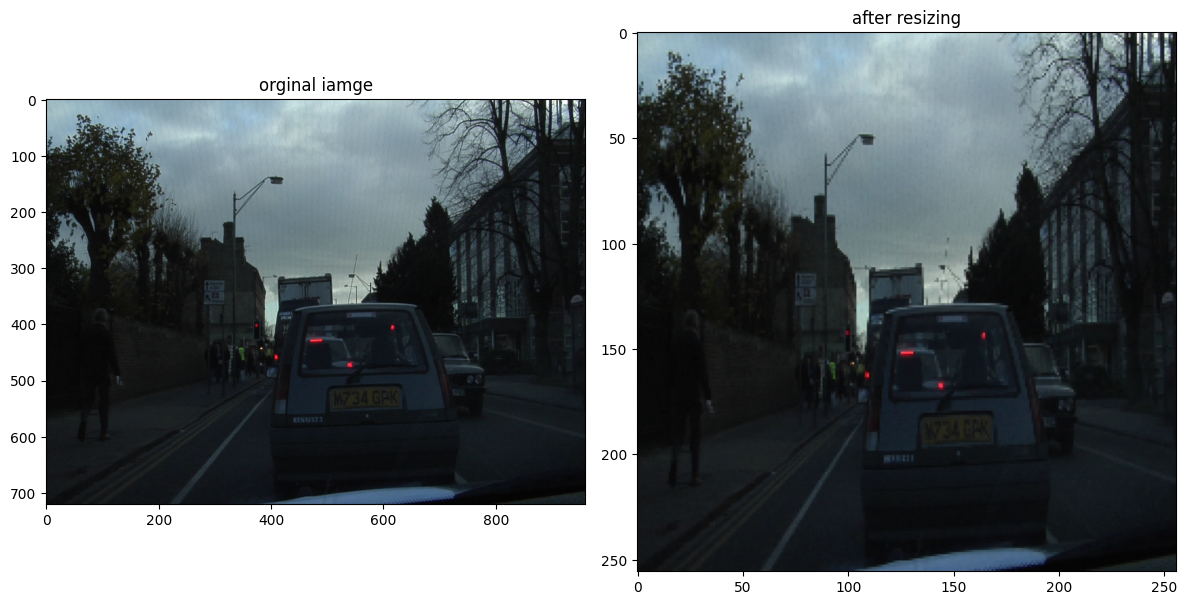

In [5]:
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.title('orginal iamge')
plt.imshow(img)
plt.subplot(1,2,2)
plt.title('after resizing')
plt.imshow(resized_img)
plt.tight_layout()

In [6]:
blured_img = blur_train([resized_img])

tf.Tensor(3, shape=(), dtype=int32)


In [7]:
blured_img = blured_img[0]
type(blured_img), blured_img.dtype, blured_img.shape

(numpy.ndarray, dtype('float32'), (256, 256, 3))

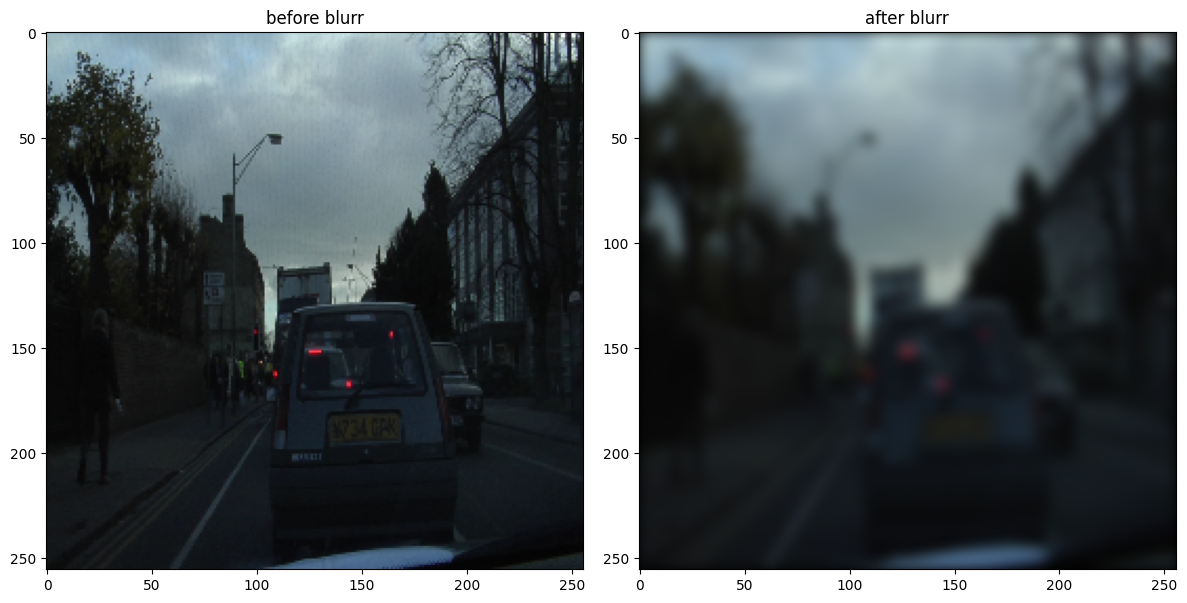

In [8]:
plt.figure(figsize=(12,10))
plt.subplot(1,2,1)
plt.title('before blurr')
plt.imshow(resized_img)
plt.subplot(1,2,2)
plt.title('after blurr')
plt.imshow(blured_img)
plt.tight_layout()

## Loading Model

In [9]:
# from keras.models import load_model

# f_seg = load_model('/kaggle/input/custom-seg-model/custom_seg_model.hdf5')

## making dataset

In [10]:
def make_img_dataset(paths_list, resize=True, shape=(256,256)):
    img_list = []
    img_path_list = []
    for path in paths_list:
        f_name_list = os.listdir(path)
        path_list = [ path+f_name for f_name in f_name_list ]
        img_path_list += path_list
    img_path_list.sort()
#     print(len(img_path_list))
    
#     for im_name in img_name_list:
#         img = plt.imread(path+im_name)
#         img_list.append(img)
        
#         img_lsit = [plt.imread(path+im_name) for im_name in img_name_list]
    img_list = [plt.imread(im_path) for im_path in img_path_list]
    
    if resize:
        resized_im_list = [ski.transform.resize(img, shape, anti_aliasing=False) for img in img_list]
        return np.array(resized_im_list)
    
    np.random.shuffle(img_list)
    
    return np.array(img_list)

In [11]:
train_img_list = make_img_dataset(['/kaggle/input/camvid/CamVid/train/', '/kaggle/input/camvid/CamVid/val/'])
len(train_img_list)

469

In [12]:
test_img_list = make_img_dataset(['/kaggle/input/camvid/CamVid/test/'])
len(test_img_list)

232

In [13]:
b_train1 = blur_train(train_img_list)
b_train2 = blur_train(train_img_list)
# b_train3 = blur_train(train_img_list)

tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype

In [14]:
b_test = blur_test(test_img_list)

In [15]:
# all_gt = train_img_list + train_img_list + train_img_list
# all_blr = b_train1 + b_train2 + b_train3

# all_gt = np.concatenate([train_img_list, train_img_list, train_img_list])
# all_blr = np.concatenate([b_train1, b_train2, b_train3])

all_gt = np.concatenate([train_img_list, train_img_list])
all_blr = np.concatenate([b_train1, b_train2])

In [16]:
type(all_gt), all_gt.shape, all_gt.dtype

(numpy.ndarray, (938, 256, 256, 3), dtype('float32'))

In [17]:
len(all_gt)

938

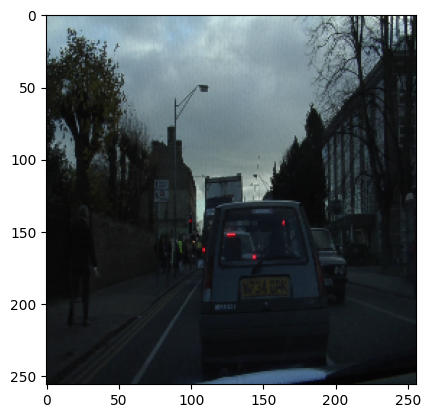

In [18]:
plt.imshow(all_gt[0])

In [19]:
# im = 27
# plt.figure(figsize=(10,16))
# plt.subplot(1,3,1)
# plt.imshow(train_img_list[im])
# plt.title('original image')
# plt.subplot(1,3,2)
# plt.imshow(b_train[im])
# plt.title('blurred image')
# plt.subplot(1,3,3)
# plt.imshow(bb_train[im])
# plt.title('double blurred image')
# plt.tight_layout()

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
plt.rcParams['figure.figsize'] = 8,8

from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
#import keras
import random
import numpy as np
import os, math
from matplotlib.pyplot import figure
#from keras.backend import tensorflow_backend
from tensorflow.keras import backend as K
# from keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from skimage.metrics import structural_similarity as ssim
import math
import cv2
import glob
import re
import tensorflow as tf
from skimage.io import imread
from matplotlib import pyplot as plt
# from skimage import segmentation, color
# from skimage import graph

import warnings
warnings.filterwarnings("ignore")

In [21]:
def plot_sample(lr, sr):
    plt.figure(figsize=(8, 6))

    images = [lr, sr]
    titles = ['denoised', 'noisy']

    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, 2, i+1)
        plt.imshow(img)
        plt.title(title)
        plt.xticks([])
        plt.yticks([])
def imgps(x):
    p = x[0] * 255
    p = p.astype(np.uint8)
    p = Image.fromarray(p)
    return p




def lsn(im,fc):
    d1=im.shape[1]
    d2=im.shape[2]
    d3=round(d1/fc)
    d4=round(d2/fc)
    w1=  (tf.image.resize(im, [d3, d4]))
    return np.asarray(tf.image.resize(w1, [d1, d2]))    

def hsn(im,fc):
    d1=im.shape[1]
    d2=im.shape[2]
    d3=round(d1*fc)
    d4=round(d2*fc)
    w1=  (tf.image.resize(im, [d3, d4]))
    return np.asarray(tf.image.resize(w1, [d1, d2])) 


def lsz(im,fc):
    d1=im.shape[1]
    d2=im.shape[2]
    d3=round(d1//fc)
    d4=round(d2//fc)
    w1=  (tf.image.resize(im, [d3, d4]))
    return np.asarray( w1)

def sub3(f1,f2,f3):
 
    fig, ax = plt.subplots(1,3,figsize=(15,15))
    plt.subplot(131)
    plt.imshow(f1)
    plt.title("Truth image")
    plt.subplot(132)
    plt.imshow(f2)
    plt.title("Restored image")
    plt.subplot(133)
    plt.imshow(f3)
    plt.title("Corrupted image")
    plt.show()
    
def adik(im):
    a= cv2.cvtColor(im, cv2.COLOR_BGR2RGB)/255
    a= cv2.resize(a, (256,256), interpolation=cv2.INTER_CUBIC)
    return a    


def tjpg(tn):
    t1=list()
    for i in range(len(tn)):
        c1=tn[i]
        #j1=np.asarray(tf.image.adjust_contrast(tf.image.random_jpeg_quality(c1, 30, 55),1.09))
        j1=np.asarray( (tf.image.random_jpeg_quality(c1, 30, 32) ))
        t1.append(np.clip(j1,0,1))
    return np.asarray(t1)




def dtls(x):
    x1=x
    x2= np.uint8(255*x1)
    sd= (x2- cv2.medianBlur(x2,3))/255
    fo= np.clip((x+sd),0,1)
    return fo

def swap(img, patch, s1, s2, s3):
    img[s1:s3, s2:s3] = patch
    return img

def cutblur(im1, im2):
    
    h, w = im1.shape[1], im1.shape[0]
    
    hr = im1.copy()
    lr = im2.copy()
    
    f = h//2 - 2
    
    r1 = np.random.randint(0, f)//2 
    r2 = np.random.randint(0, f)//2 
    
    #r1=r1+40
    #r2=r1+30
    
    hp = im1[r1:f, r2:f].copy()
    lp = im2[r1:f, r2:f].copy()
 
    
    #print(r1,r2,f)
    
    
    
    temp1 = swap(hr, lp, r1, r2, f)
    temp2 = swap(lr, hp, r1, r2, f)
    
    return temp1, temp2



def cuten(d1,d2):
    x1=list()
    y1=list()
    for i in range(len(d1)):
        xx=d1[i]
        yy=d2[i]
        ax,by=cutblur(xx,yy)
        x1.append(ax)
        y1.append(by)
    return np.asarray(x1), np.asarray(y1)
    
    
    
    
def rota(xy,dg):
    if dg==1:
        ro= np.rot90((np.asarray(xy)) ,k=1, axes=(1, 2))    
    elif dg==2:
        ro= np.rot90((np.asarray(xy)) ,k=2, axes=(1, 2))    
    elif dg==3:
        ro= np.rot90((np.asarray(xy)) ,k=3, axes=(1, 2))    
    return ro

def ox(a):
    return np.expand_dims(a,axis=0)

def nod(x,fc):
    nx= np.random.normal(scale=fc/255, size=x.shape)
    ad= np.clip(x+nx,0,1)
    return ad



def nodr(x ):
    nx= np.random.normal(scale=random.randint(5, 25)/255, size=x.shape)
    ad= np.clip(x+nx,0,1)
    return ad


 

In [22]:
def ca1(y_true, y_pred):
    
    y_pred=y_pred
            
    er = .85*mce( y_true,y_pred)+ .85*SSIMLoss(y_true, y_pred )  
    return  er
 
def cae(y_true, y_pred):
    no= abs(K.random_normal(tf.shape(y_pred),mean=0.0, stddev=.30,dtype=None,seed=5))      
        
        
    er = K.binary_crossentropy(y_true, y_pred+no)
    return er 

def cbc(y_true, y_pred):
    
        
        
    er = K.binary_crossentropy(y_true, y_pred)
    return er
    
def hu(x,fa):
    return tf.image.adjust_hue(x,fa )

def con(x,fa):
    return tf.image.adjust_contrast(x,fa )


def gm(x,fa):
    return tf.image.adjust_gamma(x,fa )

def brt(x,fa):
    return tf.image.adjust_brightness(x,fa )

def aug(x):
    a1=tf.image.flip_left_right(x )
    a2=tf.image.flip_up_down(x )
    a3=tf.image.transpose(x )
    return a1,a2,a3


def lsr(im,fc):
    d1=im.shape[1]
    d2=im.shape[2]
    d3=round(d1/fc)
    d4=round(d2/fc)
    w1=  (tf.image.resize(im, [d3, d4]))
    return  np.float32(tf.image.resize(w1, [d1, d2])) 


def mce(y_true, y_pred):
            
    evas = K.abs(y_pred - y_true)
    evas = K.mean(evas, axis=-1)
        
    return evas

def msse(y_true, y_pred):
        
    return (tf.keras.losses.mse(y_true, y_pred))

def SSIMLoss(y_true, y_pred):
    return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, 1.0))

def ca3(y_true, y_pred):
    
#     na=K.random_normal(tf.shape(y_true),mean=0.0, stddev=.80,dtype=None,seed=5)
    
#     #y_pred=y_pred+na
#     y_true=y_true+na
    
    g1,g2,g3=aug(y_true)   
    pr1,pr2,pr3=aug(y_pred)  
 
    
    l1=(ca1(g1,pr1)+ca1(g2,pr2)+ca1(g3,pr3))/3
    l2=(ca1(1-g1,1-pr1)+ca1(1-g2,1-pr2)+ca1(1-g3,1-pr3))/3
    l3=ca1(y_true, y_pred)
    
    
 
    return    (l1+ l2+ l3)/3
    

def ca4(y_true, y_pred):
    a=y_true[:,:,:,0:3]
    b=y_true[:,:,:,3:6]
    
    # y_pred=y_pred+na
#     y_true=y_true+na  
    return (ca1(a, y_pred)/2+ca1(b, y_pred))/2

 

def caa(y_true, y_pred):
    
    #a1=tf.image.flip_up_down(y_true)
    #a2=tf.image.flip_left_right(y_true)  
    #n= np.random.normal(scale=10/255, size=y_true.shape)
    
    a=tf.image.sobel_edges(y_true)
    b=tf.image.sobel_edges(y_pred)
    
    er =  mce(a , b) + tf.reduce_mean( mce(y_true, y_pred)) 
    return  er/2  

# Model

In [23]:
def mdsr1(ix,f):
    x=Conv2D(f, kernel_size=3, strides=1, padding='same')(ix)
    
    x1=r1(x,f)
    x1=r1(x1,f)
    x2=r1(x,f)
    x2=r1(x2,f)
    x3=r1(x,f)
    x3=r1(x3,f)
    x=add([x1,x2,x3])
    x=concatenate([x,x1,x2,x3 ], axis = 3)
    x=Conv2D(f, kernel_size=3, strides=1, padding='same')(x)
    return x 


def r1(input_tensor, features ):
    x = Conv2D(features, 3, activation='relu', padding='same')(input_tensor)
    x = Conv2D(features, 3, padding='same')(x)
    return add([input_tensor, x])

def global_repsonse_norm(tnsr_op):

    axis = -1
    num_dims = len(tnsr_op.shape)
    norm_scale = tf.cast(tf.shape(tnsr_op)[1] * tf.shape(tnsr_op)[2], tnsr_op.dtype) ** 0.5
    nn_op = tf.reduce_mean(tf.math.square(tnsr_op),
                              axis=[ii for ii in range(1, num_dims) if ii != axis], keepdims=True)
    nn_op = tf.math.sqrt(nn_op) * norm_scale
    nn_op = nn_op / (tf.reduce_mean(nn_op, axis=axis, keepdims=True) + 1e-6)
    return tnsr_op + nn_op


In [24]:
def DnCNN():
    input_img = Input(shape=(None,None,3))
    # 1st layer, Conv+relu
    x = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same')(input_img)
    x = Activation('relu')(x)
        # 15 layers, Conv+BN+relu
    for i in range(15):
        x = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same')(x)
        #x = BatchNormalization(axis=-1, epsilon=1e-3)(x)
        x = Activation('relu')(x)   
        # last layer, Conv
    x = Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='same')(x)
    x = Subtract()([input_img, x])   # input - noise

    model = Model(input_img, x)
    return model


def Dnsr():
    input_img = Input(shape=(None,None,3))
    # 1st layer, Conv+relu
    x = Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same')(input_img)
    x0 = Conv2D(filters=64, kernel_size=(1,1), strides=(1,1), padding='same')(input_img)
    y0 = mdsr1(x0,64)
    for i in range(5):
        x =  r1(x,64)
        x = global_repsonse_norm(add([x , x0]))
    x = concatenate([y0,x])    
    x = Conv2D(filters=3, kernel_size=(3,3), strides=(1,1), padding='same')(x)
    
    x = add([x , input_img])
    
    
    model = Model(input_img, x)
    return model


model = Dnsr()

 


opt = keras.optimizers.Adam( )

model.compile(loss='mae', optimizer=opt,    metrics=[  "accuracy"])

In [25]:
 
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.4,
                              patience = 6,
                              verbose = 1,
                              min_delta = 0.0001)

filepath="A_cvpru.h5"
checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')
def psnr_m(y_true, y_pred,):
    return  tf.reduce_mean(tf.image.psnr(y_true, y_pred, 1.0))
    
def ssim_m(y_true, y_pred,):
    return tf.reduce_mean(tf.image.ssim(y_true, y_pred, 1.0))
    

In [26]:
def SSIMLoss(y_true, y_pred):
    return 1 - tf.reduce_mean(tf.image.ssim(y_true, y_pred, 1.0)) 

def msse(y_true, y_pred):
    return K.mean(tf.keras.losses.mse(y_true, y_pred))


def closs(y_true, y_pred):
    return ( 0.2* SSIMLoss(y_true, y_pred)  + msse(y_true, y_pred))

In [27]:
def sub3(f1,f2,f3):
 
    fig, ax = plt.subplots(1,3,figsize=(15,15))
    plt.subplot(131)
    plt.imshow(f1)
    plt.title("Truth image")
    plt.subplot(132)
    plt.imshow(f2)
    plt.title("Restored image")
    plt.subplot(133)
    plt.imshow(f3)
    plt.title("Corrupted image")
    plt.show()

## Self-supervised denoising

In [28]:
X_train, X_val, y_train, y_val = train_test_split( all_blr, all_gt,  test_size=0.1, random_state=42)

In [29]:
# X_train.shape, X_val.shape, y_train.shape, y_val.shape

In [30]:
# type(X_train), X_train.dtype, len(X_train)

In [31]:
# augmentation function

def aug_aftr(ary, optn):
    if optn ==1:
        aryaug = tf.image.flip_up_down(ary)
    if optn ==2:
        aryaug=tf.image.transpose(ary )
    else:
        aryaug = tf.image.flip_left_right(ary)
    return aryaug
        




X_traina = np.concatenate([X_train,  aug_aftr(X_train,3), aug_aftr(X_train,1), aug_aftr(X_train,2)])
y_traina = np.concatenate([y_train,  aug_aftr(y_train,3), aug_aftr(y_train,1), aug_aftr(y_train,2)]) 

In [ ]:
# bzs = 16

# b_train = X_train
 

# val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
# val_dataset = val_dataset.batch(bzs)

# # In self supervised setup, we dont have clean target for the trianing image;
# # hence, the dataset is unpaired
# # We have create our own apporoach to make it paired or at least self paired.

# b_train_plus = blur_train(X_train)


bzs = 16

b_train = X_traina
 

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(bzs)

# In self supervised setup, we dont have clean target for the trianing image;
# hence, the dataset is unpaired
# We have create our own apporoach to make it paired or at least self paired.

b_train_plus = blur_train(X_traina)

In [33]:
# Network Parameters
input_shape = (256, 256, 3)
batch_size = 16
kernel_size = 3
latent_dim = 256

# Encoder/Decoder number of CNN layers and filters per layer
layer_filters = [32, 64, 128]

inputs = Input(shape = input_shape, name = 'encoder_input')
x = inputs

In [34]:
# encoder model
for filters in layer_filters:
    x = Conv2D(filters=filters,
               kernel_size=kernel_size,
               strides=2,
               activation='relu',
               padding='same')(x)
shape = K.int_shape(x)
x = Flatten()(x)

# latent layer
latent = Dense(latent_dim, name='latent_vector')(x)

encoder = Model(inputs, latent, name = 'encoder')
encoder.summary()

Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 256, 256, 3)]     0         
                                                                 
 conv2d_27 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_28 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 conv2d_29 (Conv2D)          (None, 32, 32, 128)       73856     
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 latent_vector (Dense)       (None, 256)               33554688  
                                                                 
Total params: 33647936 (128.36 MB)
Trainable params: 336479

In [35]:
# decoder
latent_inputs = Input(shape=(latent_dim,), name='decoder_input')
x = Dense(shape[1]*shape[2]*shape[3])(latent_inputs)
x = Reshape((shape[1], shape[2], shape[3]))(x)
for filters in layer_filters[::-1]:
    x = Conv2DTranspose(filters=filters,
                        kernel_size=kernel_size,
                        strides=2,
                        activation='relu',
                        padding='same')(x)

outputs = Conv2DTranspose(filters=3,
                          kernel_size=kernel_size,
                          activation='sigmoid',
                          padding='same',
                          name='decoder_output')(x)

decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 decoder_input (InputLayer)  [(None, 256)]             0         
                                                                 
 dense (Dense)               (None, 131072)            33685504  
                                                                 
 reshape (Reshape)           (None, 32, 32, 128)       0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 64, 64, 128)       147584    
 anspose)                                                        
                                                                 
 conv2d_transpose_1 (Conv2D  (None, 128, 128, 64)      73792     
 Transpose)                                                      
                                                                 
 conv2d_transpose_2 (Conv2D  (None, 256, 256, 32)      1846

In [36]:
autoencoder = Model(inputs, decoder(encoder(inputs)), name='autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 256, 256, 3)]     0         
                                                                 
 encoder (Functional)        (None, 256)               33647936  
                                                                 
 decoder (Functional)        (None, 256, 256, 3)       33926211  
                                                                 
Total params: 67574147 (257.77 MB)
Trainable params: 67574147 (257.77 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-4)

In [38]:
autoencoder.compile(loss='mse', optimizer='adam', metrics=[psnr_m,ssim_m, "accuracy"]) 

In [39]:
history = autoencoder.fit(b_train_plus, b_train, validation_data=val_dataset,
                    epochs=45, batch_size=16, callbacks = [checkpoint,reduce_lr])

Epoch 1/45
211/211 [==============================] - ETA: 0s - loss: 0.0295 - psnr_m: 16.1646 - ssim_m: 0.5759 - accuracy: 0.4513
Epoch 1: val_loss improved from inf to 0.02646, saving model to A_cvpru.h5
211/211 [==============================] - 26s 75ms/step - loss: 0.0295 - psnr_m: 16.1646 - ssim_m: 0.5759 - accuracy: 0.4513 - val_loss: 0.0265 - val_psnr_m: 15.9967 - val_ssim_m: 0.4095 - val_accuracy: 0.4329 - lr: 0.0010
Epoch 2/45
211/211 [==============================] - ETA: 0s - loss: 0.0127 - psnr_m: 19.4264 - ssim_m: 0.6649 - accuracy: 0.5006
Epoch 2: val_loss improved from 0.02646 to 0.02228, saving model to A_cvpru.h5
211/211 [==============================] - 15s 73ms/step - loss: 0.0127 - psnr_m: 19.4264 - ssim_m: 0.6649 - accuracy: 0.5006 - val_loss: 0.0223 - val_psnr_m: 16.7654 - val_ssim_m: 0.4280 - val_accuracy: 0.4870 - lr: 0.0010
Epoch 3/45
211/211 [==============================] - ETA: 0s - loss: 0.0098 - psnr_m: 20.6498 - ssim_m: 0.6885 - accuracy: 0.5246
Epoch

In [40]:
# X_val_p_self = autoencoder.predict(X_val)


# print('psnr',psnr_m(y_val,X_val_p_self  ).numpy())

# print('ssim',ssim_m(y_val,X_val_p_self  ).numpy())

In [41]:
X_val_p_self = autoencoder.predict(X_val)


print('psnr',psnr_m(y_val,X_val_p_self  ).numpy())

print('ssim',ssim_m(y_val,X_val_p_self  ).numpy())

# X_val_p_self = autoencoder.predict(b_test)

# print('psnr',psnr_m(test_img_list,X_val_p_self  ).numpy())

# print('ssim',ssim_m(test_img_list,X_val_p_self  ).numpy())

3/3 [==============================] - 1s 130ms/step
psnr 19.997154
ssim 0.5360376


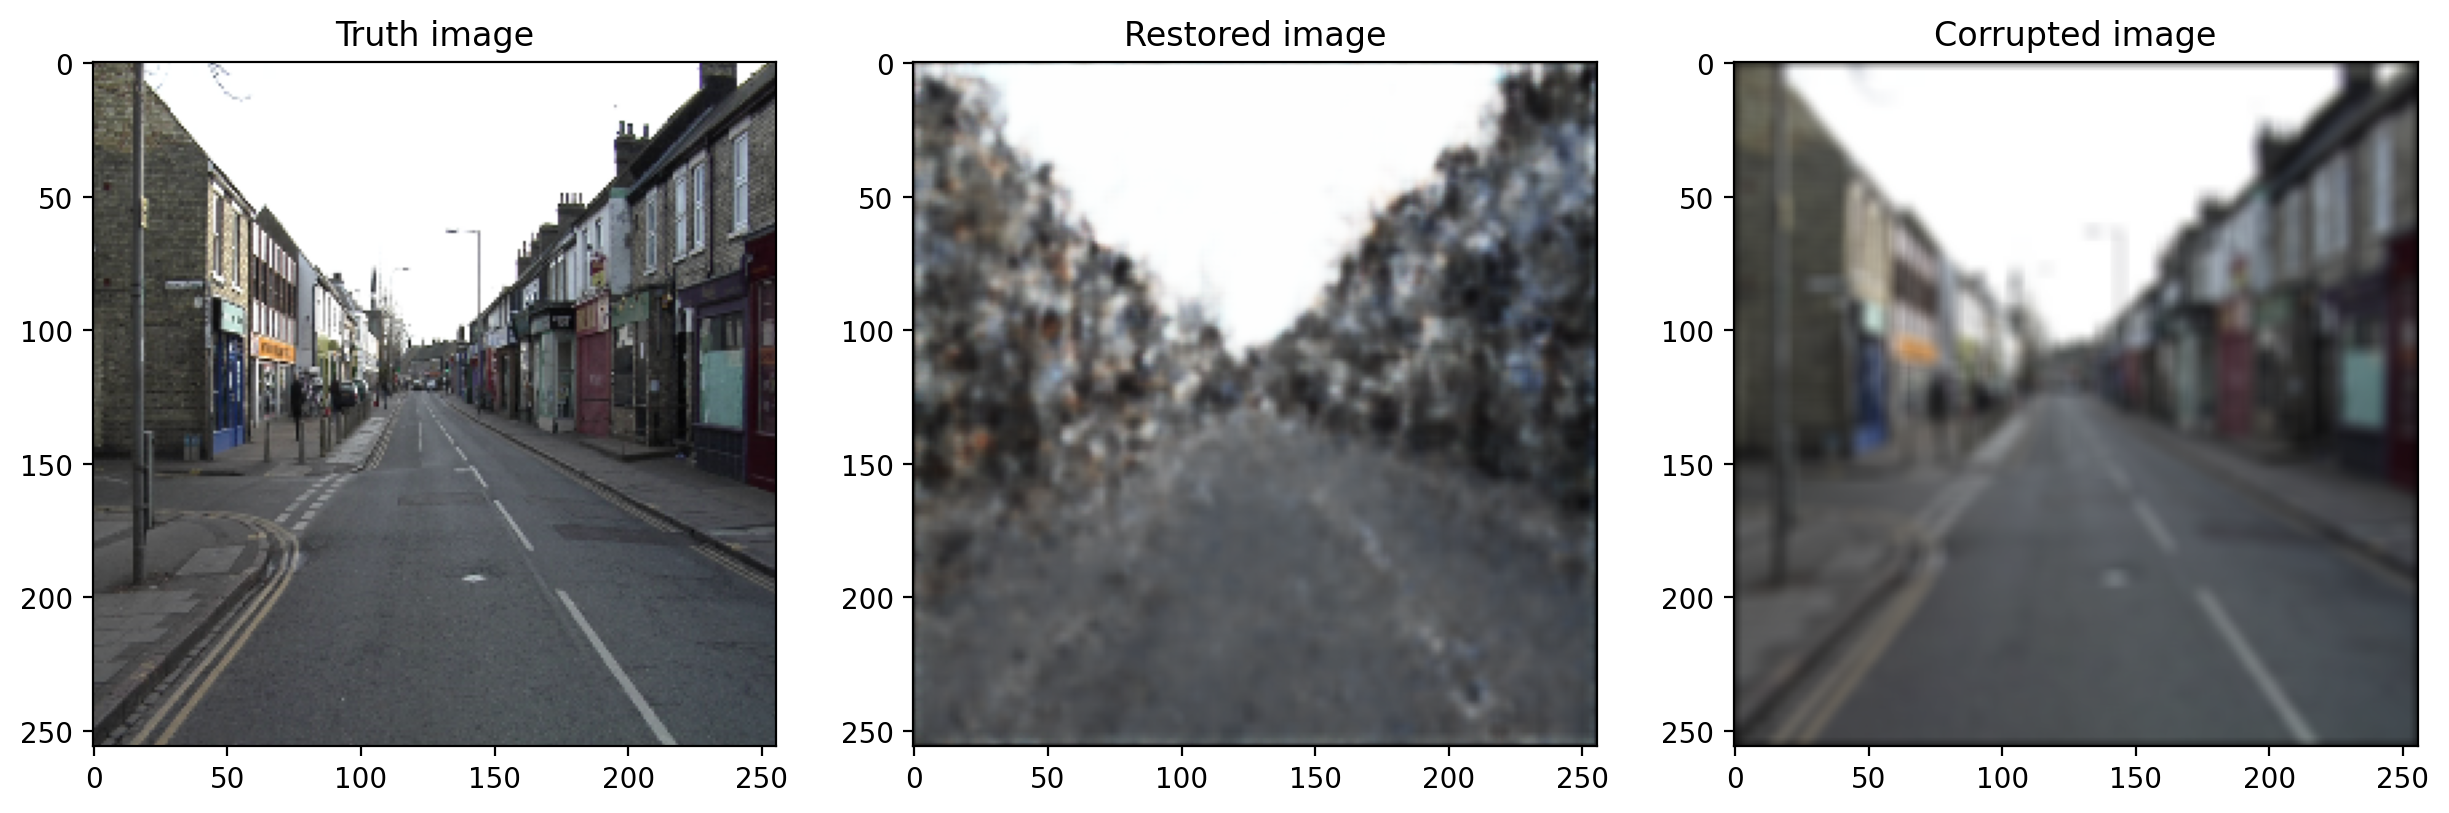

In [42]:
rid = 15
sub3(y_val[rid],X_val_p_self[rid],X_val[rid] )
# sub3(test_img_list[rid],X_val_p_self[rid],b_test[rid] )

8/8 [==============================] - 0s 51ms/step
psnr 18.389788
ssim 0.4677215


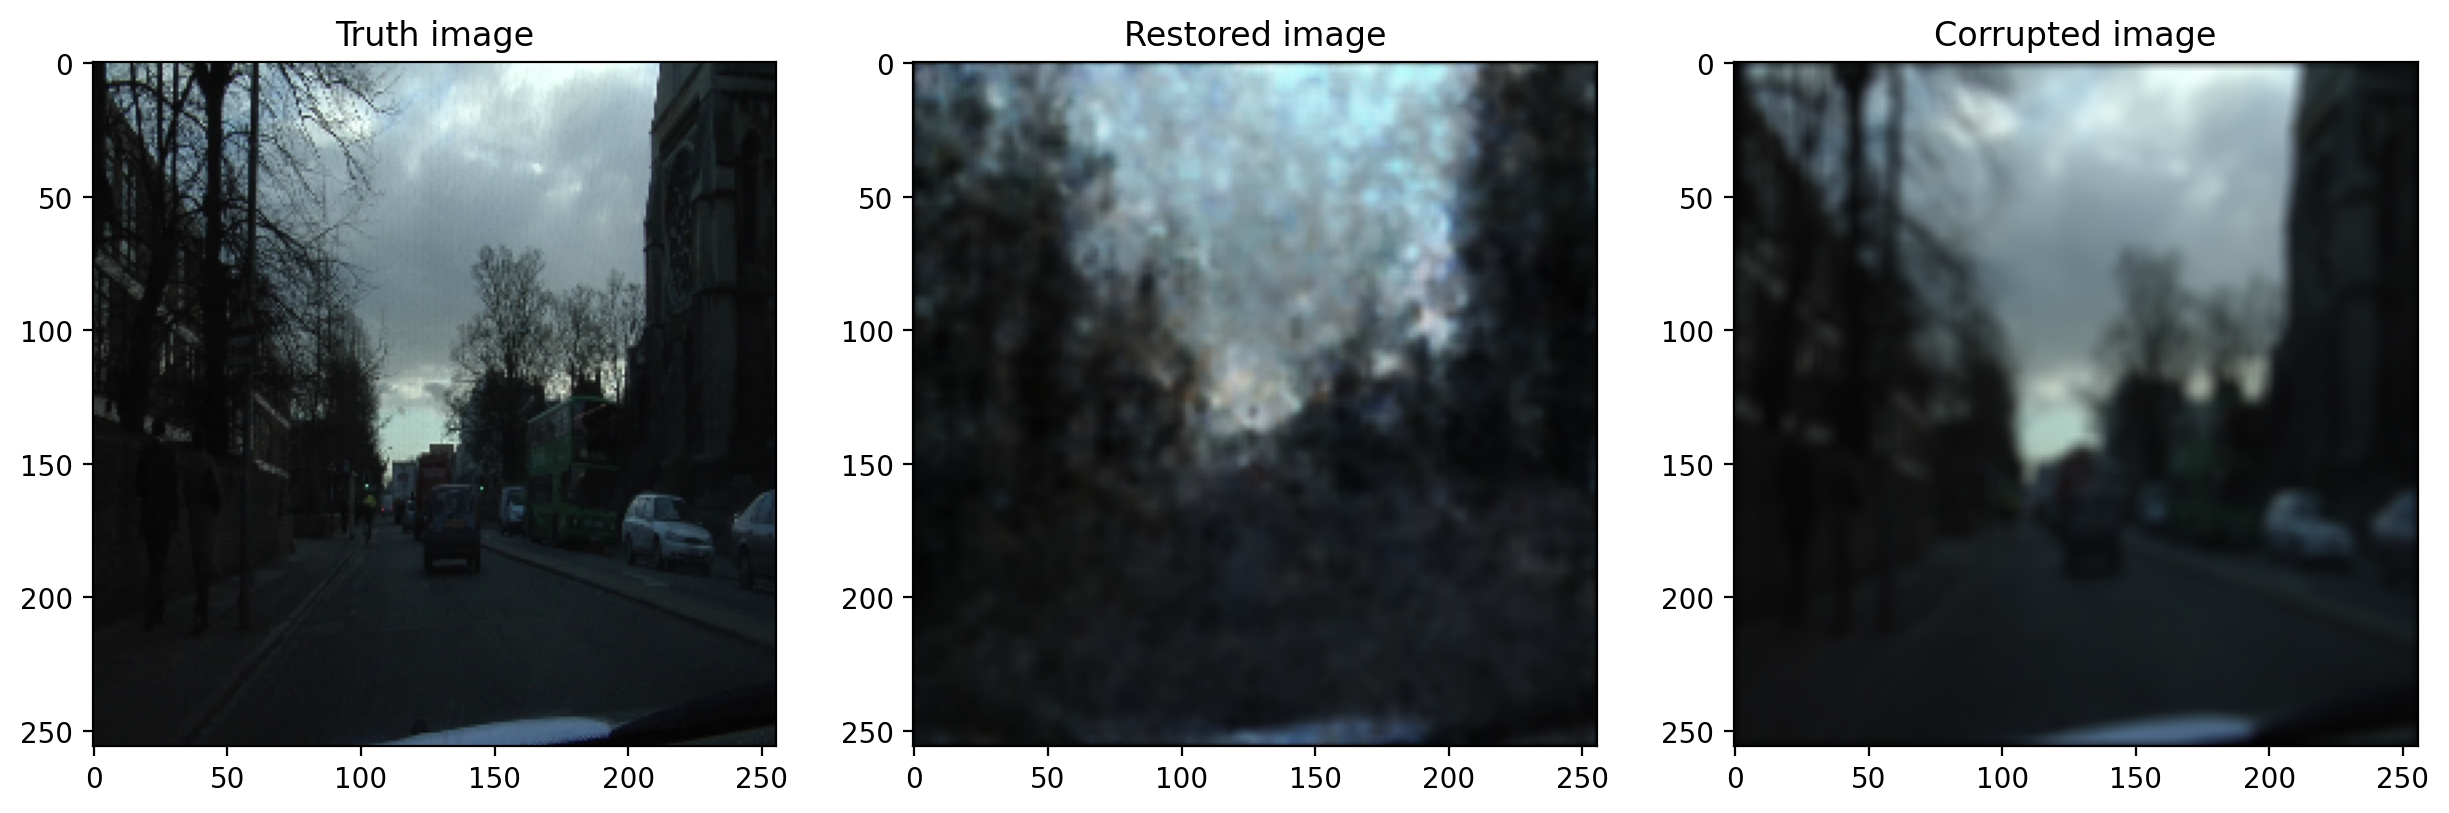

In [43]:
X_val_p_self = autoencoder.predict(b_test)

print('psnr',psnr_m(test_img_list,X_val_p_self  ).numpy())

print('ssim',ssim_m(test_img_list,X_val_p_self  ).numpy())

rid = 15
sub3(test_img_list[rid],X_val_p_self[rid],b_test[rid] )

In [44]:
# def cont(fcx):
#     return 3*fcx**2 - 2* fcx**3

In [45]:
# def gaussian_blur_train(img):
    
#     kst = [5,7,9,11,3]
#     dgt = [3,5]
    
#     kernel_size = kst[np.random.choice(len(kst))]
#     sigma =  dgt[np.random.choice(len(dgt))]  #3
    
#     def gauss_kernel(channels, kernel_size, sigma):
#         ax = tf.range(-kernel_size // 2 + 1.0, kernel_size // 2 + 1.0)
#         xx, yy = tf.meshgrid(ax, ax)
#         kernel = tf.exp(-(xx ** 2 + yy ** 2) / (2.0 * sigma ** 2))
#         kernel = kernel / tf.reduce_sum(kernel)
#         kernel = tf.tile(kernel[..., tf.newaxis], [1, 1, channels])
#         return kernel

#     gaussian_kernel = gauss_kernel(tf.shape(img)[-1], kernel_size, sigma)
#     gaussian_kernel = gaussian_kernel[..., tf.newaxis]

#     return tf.nn.depthwise_conv2d(img, gaussian_kernel, [1, 1, 1, 1],
#                                   padding='SAME', data_format='NHWC')



# br = blur_train(y_val)

## Loading segmentation model

In [46]:
import numpy as np 
import os
import tensorflow as tf
#import skimage.io as io
#import skimage.transform as trans
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras import backend as K
# from tensorflow.keras.utils import *
from tensorflow.keras.regularizers import * 

In [47]:
 # Clear all previously registered custom objects
keras.saving.get_custom_objects().clear()


@keras.saving.register_keras_serializable(package="my_package", name="dice")
def dice(y_true, y_pred, smooth=1):
    
    intersection = K.sum(y_true * y_pred, axis=[-1])
    union = K.sum(y_true, axis=[-1]) + K.sum(y_pred, axis=[-1])
    dicef = K.mean((2. * intersection + smooth)/(union + smooth), axis=-1)
    return dicef


@keras.saving.register_keras_serializable(package="my_package", name="IOU")
def IOU(y_true, y_pred, smooth=1):

    intersection = K.sum(y_true * y_pred, axis=[-1])
    union = K.sum(y_true, axis=[-1]) + K.sum(y_pred, axis=[-1])-intersection
    iou_scr = K.mean(( intersection + smooth)/(union + smooth), axis=-1)
    return iou_scr

In [48]:
reconstructed_seg_model = keras.models.load_model(
    "/kaggle/input/custom-segmentation-mode/custom_seg_model.hdf5",
    custom_objects={"dice": dice, "IOU": IOU},
)


In [59]:
### mapping mask labels

classes = pd.read_csv('/kaggle/input/camvid/CamVid/class_dict.csv')

classes_dict = {classes.loc[cl][0]:list(classes.loc[cl][1:]) for cl in classes.index}

idx2rgb={idx:np.array(rgb) for idx, (cl, rgb) in enumerate(classes_dict.items())}

def map_class_to_rgb(p):
    return idx2rgb[p[0]]

In [49]:
# reconstructed_deblur_model = keras.models.load_model(
#     "/kaggle/working/A_cvpru.h5",
#     custom_objects={"dice": dice, "IOU": IOU},
# )

In [50]:
def visualize_seg(img, gt_mask, shape='normal', gt_mode='sparse'):
  fig , ax = plt.subplots(1,3,figsize=(10,10))
  
  # Img
  ax[0].imshow(img)
  ax[0].set_title("Orignal Image")
  
  # Predict
#   pred_mask = model.predict(np.expand_dims(img, 0))
  pred_mask = reconstructed_seg_model.predict(np.expand_dims(img, 0))
  pred_mask = np.argmax(pred_mask, axis=-1)
  pred_mask = pred_mask[0]
  if shape=='flat':
    pred_mask = np.reshape(pred_mask, (256,256)) # Reshape only if you use the flat model. O.w. you dont need
  
  rgb_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(pred_mask, -1))
  
  # Prediction
  ax[1].imshow(rgb_mask)
  ax[1].set_title("Predicted Mask")

              
  # GT mask
  if gt_mode == 'ohe':
    gt_img_ohe = np.argmax(gt_mask, axis=-1)
    gt_mask = np.apply_along_axis(map_class_to_rgb, -1, np.expand_dims(gt_img_ohe, -1))              
  
  ax[2].imshow((gt_mask).astype(np.uint8))
  ax[2].set_title("Ground truth")

In [56]:
def make_test_dataset(path, shape=(256,256)):
    f_name_list = os.listdir(path)
    path_list = [ path+f_name for f_name in f_name_list ]
    img_path_list = path_list
    img_list = [plt.imread(im_path) for im_path in img_path_list]
    resized_im_list = [ski.transform.resize(img, shape, anti_aliasing=False) for img in img_list]
    return np.array(resized_im_list)

### loading test images and labels

In [57]:
test_img = make_test_dataset('/kaggle/input/camvid/CamVid/test/')
test_img_mask = make_test_dataset('/kaggle/input/camvid/CamVid/test_labels/')
b_test_img = blur_test(test_img)

In [63]:
batch_sz = 8
data_gen_args = dict(rescale=1./255)

# So our usage here is as data loader instead of loading everything in RAM, not data augmentation
mask_gen_args = dict()

image_datagen = ImageDataGenerator(**data_gen_args)
mask_datagen  = ImageDataGenerator(**mask_gen_args) 
# Provide the same seed and keyword arguments to the fit and flow methods
seed = 1

BASE_PATH = "/kaggle/input/camvid/CamVid/"

test_image_generator = image_datagen.flow_from_directory(
    BASE_PATH,
    class_mode=None,
    classes=['test'],
    seed=seed,
    batch_size=batch_sz,
    target_size=(256,256))

test_mask_generator = mask_datagen.flow_from_directory(
    BASE_PATH,
    classes=['test_labels'],
    class_mode=None,
    seed=seed,
    batch_size=batch_sz,
    color_mode='rgb',
    target_size=(256,256))

b_test_image_generator = image_datagen.flow(
    b_test_img,
    batch_size=batch_sz,
    seed=seed,
    ignore_class_split=False,
    
#     class_mode=None,
#     classes=['test'],
#     target_size=(256,256)
    )

test_generator = zip(test_image_generator, test_mask_generator)
test_generator = zip(b_test_image_generator, test_mask_generator)

Found 232 images belonging to 1 classes.
Found 232 images belonging to 1 classes.


### predicting test images

1/1 [==============================] - 0s 20ms/step


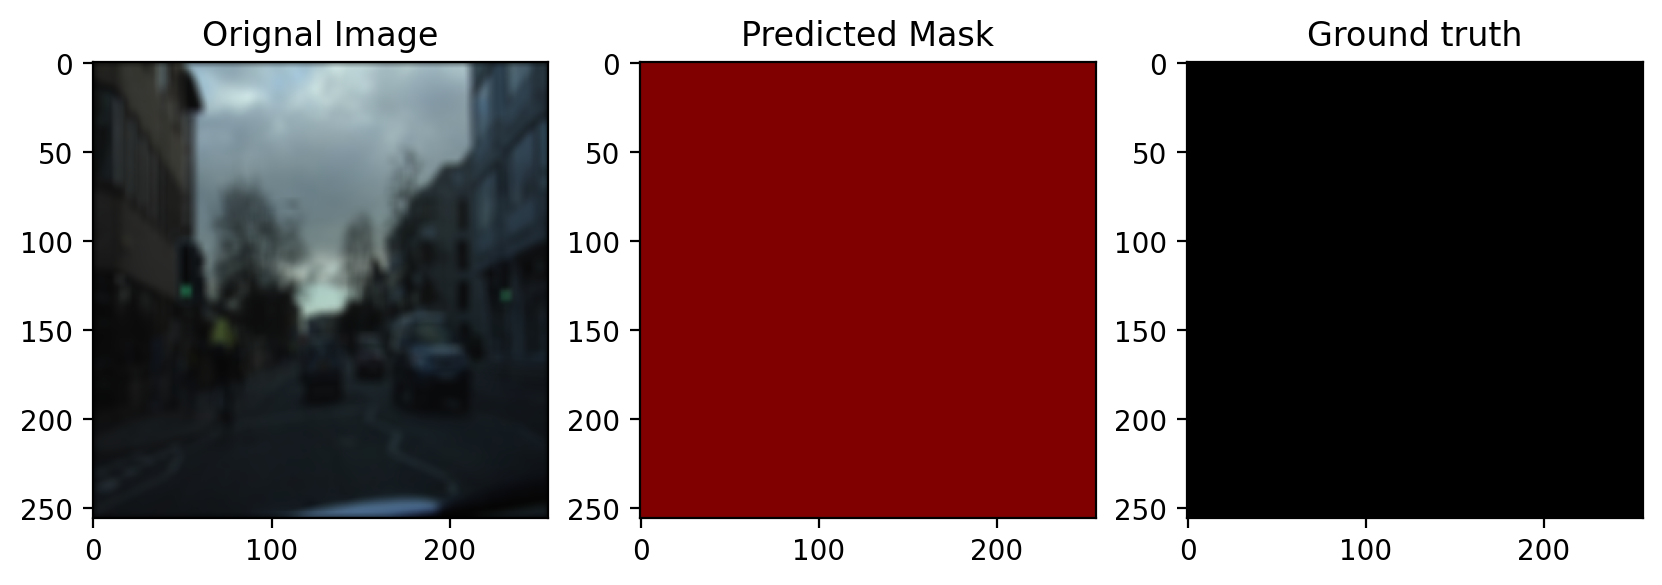

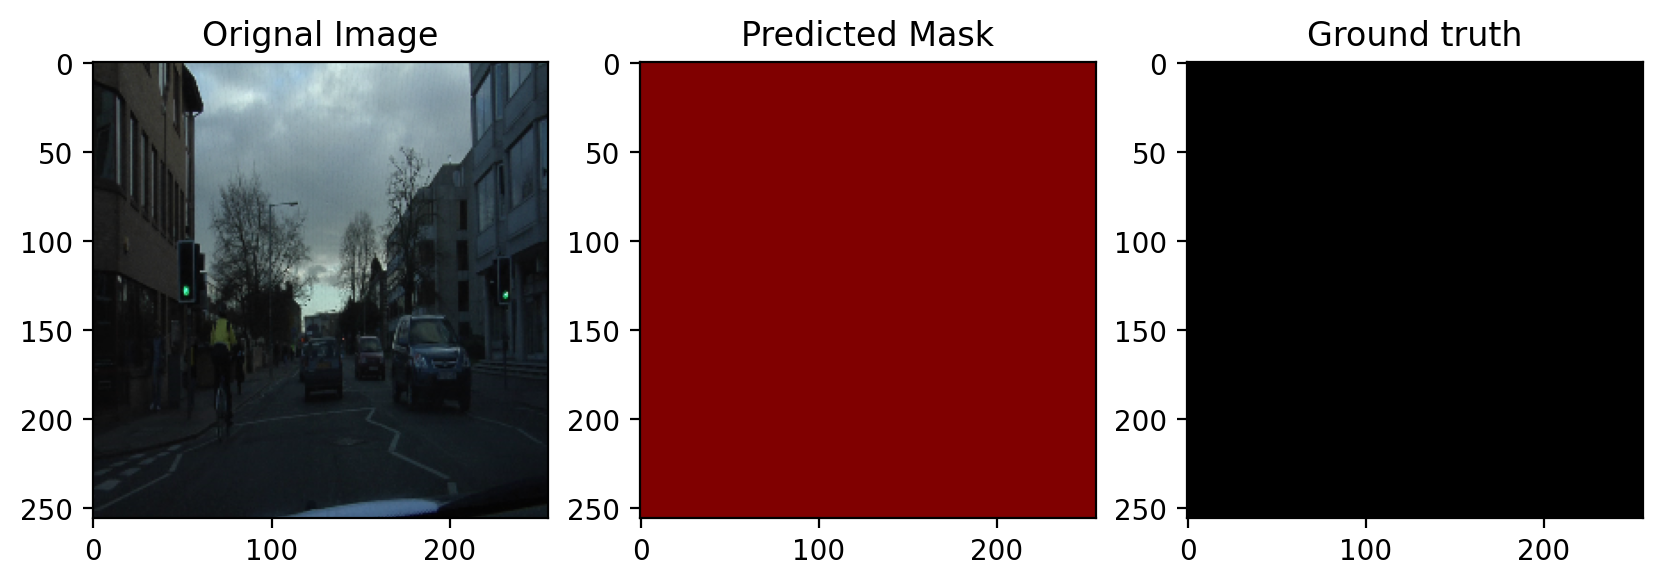

In [60]:
imn = 10
visualize_seg(b_test_img[imn], test_img_mask[imn], shape='normal', gt_mode='sparse')
visualize_seg(test_img[imn], test_img_mask[imn], shape='normal', gt_mode='sparse')

1/1 [==============================] - 0s 20ms/step


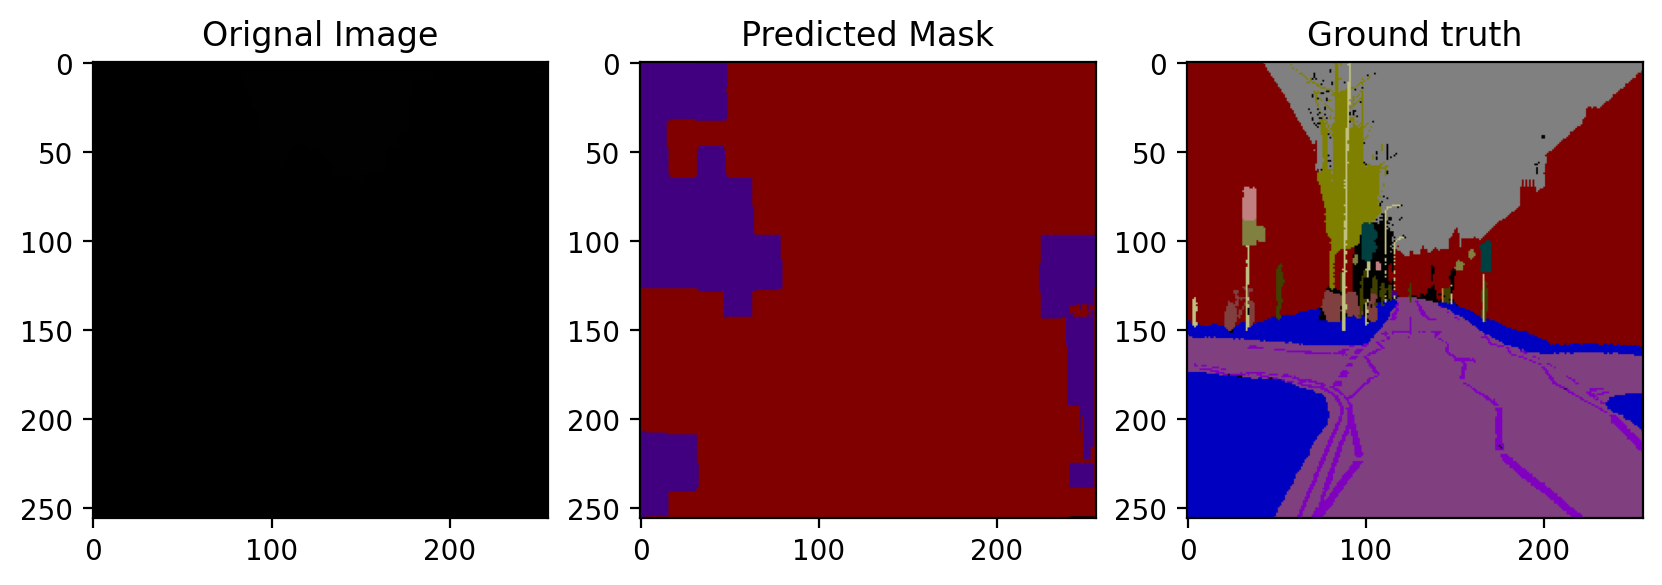

In [64]:
img = next(b_test_image_generator)[0]
gt_img = next(test_mask_generator)[0]
visualize_seg(img, gt_img, gt_mode='sparse')

1/1 [==============================] - 0s 18ms/step


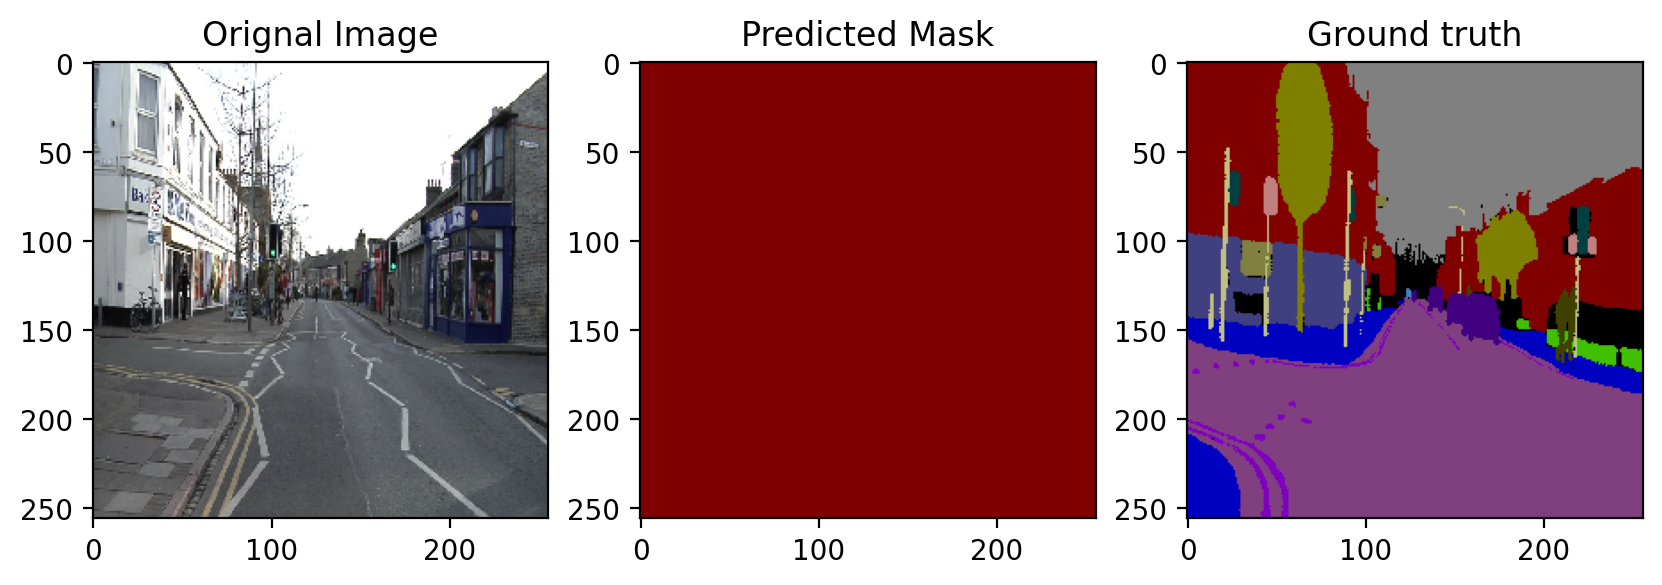

In [65]:
img = next(test_image_generator)[0]
gt_img = next(test_mask_generator)[0]
visualize_seg(img, gt_img, gt_mode='sparse')

In [ ]:
# reconstructed_seg_model.predict()